In [1]:
from modsim import *

In [3]:
# ch11
def make_system(beta, gamma) -> System:
    init = State(s=89, i=1, r=0)
    init /= init.sum()
    return System(init=init, t_end=7*14, beta=beta, gamma=gamma)

def update_func(t, state, system):
    s, i, r = state.s, state.i, state.r
    infected = system.beta * i * s
    recovered = system.gamma * i
    s -= infected
    i += infected - recovered
    r += recovered
    return State(s=s, i=i, r=r)

def run_simulation(system, update_func):
    frame = TimeFrame(columns=system.init.index)
    frame.loc[0] = system.init
    for t in range(0, system.t_end):
        frame.loc[t+1] = update_func(t, frame.loc[t], system)
    return frame

def plot_results(S, I, R):
    S.plot(style='--', label='Susceptible')
    I.plot(style='-', label='Infected')
    R.plot(style=':', label='Recovered')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

# ch12    
def calc_total_infected(results, system):
    s_0 = results.s[0]
    s_end = results.s[system.t_end]
    return s_0 - s_end

In [4]:
beta_array = linspace(0.1, 1.1, 11)
gamma = 0.25
beta_array, gamma

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]), 0.25)

In [5]:
def sweep_beta(beta_array, gamma):
    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma)
        results = run_simulation(system, update_func)
        sweep[beta] = calc_total_infected(results, system)
    return sweep

In [6]:
infected_sweep = sweep_beta(beta_array, gamma)

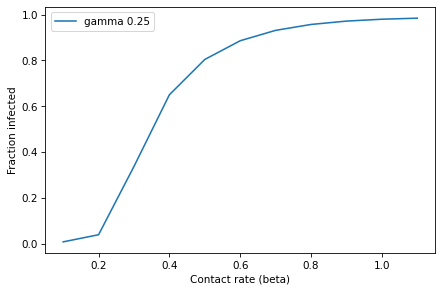

In [7]:
infected_sweep.plot(label=f'gamma {gamma}')
decorate(xlabel='Contact rate (beta)', ylabel='Fraction infected')

In [8]:
gamma_array = linspace(0.1, 0.7, 4)
gamma_array

array([0.1, 0.3, 0.5, 0.7])

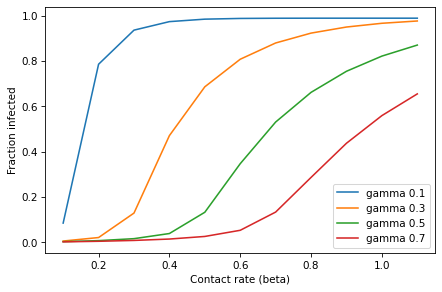

In [9]:
for gamma in gamma_array:
    infected_sweep = sweep_beta(beta_array, gamma)
    infected_sweep.plot(label=f'gamma {gamma}')

decorate(xlabel='Contact rate (beta)', ylabel='Fraction infected')

In [10]:
def sweep_parameters(beta_array, gamma_array):
    frame = SweepFrame(columns=gamma_array)
    for gamma in gamma_array:
        sweep = sweep_beta(beta_array, gamma)
        frame[gamma] = sweep
    return frame

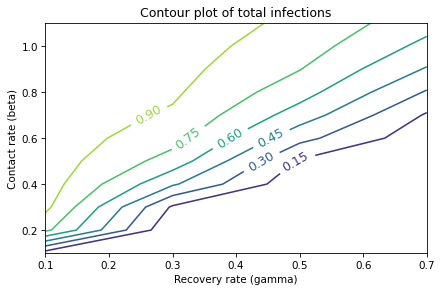

In [11]:
frame = sweep_parameters(beta_array, gamma_array)
contour(frame)
decorate(xlabel='Recovery rate (gamma)', ylabel='Contact rate (beta)', 
         title='Contour plot of total infections')

In [ ]:
# Exercise 13.1
# If we know beta and gamma, we can compute the fraction of the population that gets infected.
# In general, we don’t know these parameters, but sometimes we can estimate them based on the 
# behavior of an outbreak. 
# Suppose the infectious period for the Freshman Plague is known to be two days on average, 
# and suppose during one particularly bad year 40 percent of the class is infected at some 
# point. Estimate the time between contacts, 1/beta.”


In [13]:
frame

,0.1,0.3,0.5,0.7
Parameter,,,,
0.1,0.084693,0.005444,0.002736,0.001827
0.2,0.785673,0.020878,0.007235,0.004367
0.3,0.936118,0.128878,0.015929,0.008129
0.4,0.973692,0.470707,0.038603,0.014242
0.5,0.984596,0.686050,0.132438,0.025708
0.6,0.987757,0.807741,0.346765,0.052853
0.7,0.988620,0.879474,0.530585,0.133248
0.8,0.988834,0.923024,0.661553,0.286258
0.9,0.988880,0.949853,0.754595,0.436999


In [19]:
gamma = 0.5
beta_array = linspace(0.4, 0.45, 11)
beta_array, gamma

(array([0.4  , 0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 ,
        0.445, 0.45 ]),
 0.5)

In [20]:
infected_sweep = sweep_beta(beta_array, gamma)
show(infected_sweep)

,Metric
Parameter,
0.400,0.038603
0.405,0.040659
0.410,0.042869
0.415,0.045249
0.420,0.047816
0.425,0.050589
0.430,0.053587
0.435,0.056832
0.440,0.060348


In [22]:
1 / 0.405

2.4691358024691357

In [23]:
# time between contacts is 2.47